In [1]:
import numpy as np
import pandas as pd
import scipy
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import ComplementNB

% matplotlib inline

In [2]:
# Add some formatting to make output bold
from IPython.display import Markdown, display
def printmd(string):
    display(Markdown(string))


In [3]:
def check_sentiment(data_path, description):
    review_raw = pd.read_csv(data_path, delimiter='\t', header=None)
    review_raw.columns = ['review', 'sentiment']
    
    pos_keywords = ['great', 'loved', 'love', 'awesome', 'amazing', 'fav',
               'excellent', 'good', 'enjoyed', 'best', 'yummy', 'pleasure', 'wow']

    neg_keywords = ['not', 'angry', 'didn\'t', 'disgusted', 'slow', 'nasty', 
                'dirty', 'avoid', 'disappointed', 'never', 'disappointing', 
                'poor', 'bad', 'wasted']

    for key in pos_keywords:
        review_raw[str(key)] = review_raw.review.str.contains(
            ' ' + str(key) + ' ', 
            case=False
        )

    # Since these would be negatively correlated with positive sentiment, reverse the 
    # boolean to keep True positively correlated
    for key in neg_keywords:
        review_raw[str(key)] = ~review_raw.review.str.contains(
            ' ' + str(key) + ' ',
            case=False
        )
    
    # Exclamation marks more commonly found in positive reviews
    review_raw['exclamation'] = review_raw.review.str.contains('!')
    
    #Thought maybe length of review would be related, but this didn't help
    review_raw['long'] = review_raw.review.str.len()
    review_raw['long'] = [0 if x < 80 else 1 for x in review_raw['long']]

    fig, ax = plt.subplots(figsize=(10,10))
    sns.heatmap(review_raw.corr(), vmax=1, vmin=-1, cmap='coolwarm', ax=ax)
    plt.show()
    
    # specifying variables and outcomes for SKLearn
    data = review_raw[pos_keywords + neg_keywords + ['exclamation'] + ['long']]
    target = review_raw['sentiment']

    printmd('**' + description + '**')
    
    bnb = BernoulliNB()

    bnb.fit(data, target)
    y_pred = bnb.predict(data)

    # Display our results
    print('Bernoulli Naive Bayes.')
    print('Number of mislabeled points out of a total {} points : {}\n'.format(
        data.shape[0], 
        (target != y_pred).sum()
    ))
    
    # Specify another type of bayes filter - Gaussian
    gnb = GaussianNB()
    gnb.fit(data, target)

    y_pred_g = gnb.predict(data)

    # Display results
    print('Gaussian Naive Bayes.')
    print('Number of mislabeled points out of a total {} points : {}\n'.format(
        data.shape[0],
        (target != y_pred_g).sum()
    ))
    
    # Specify another type of bayes filter - Complement
    cnb = ComplementNB()
    cnb.fit(data, target)

    y_pred_c = cnb.predict(data)

    # Display results
    print('Complement Naive Bayes.')
    print('Number of mislabeled points out of a total {} points : {}\n'.format(
        data.shape[0],
        (target != y_pred_c).sum()
    ))

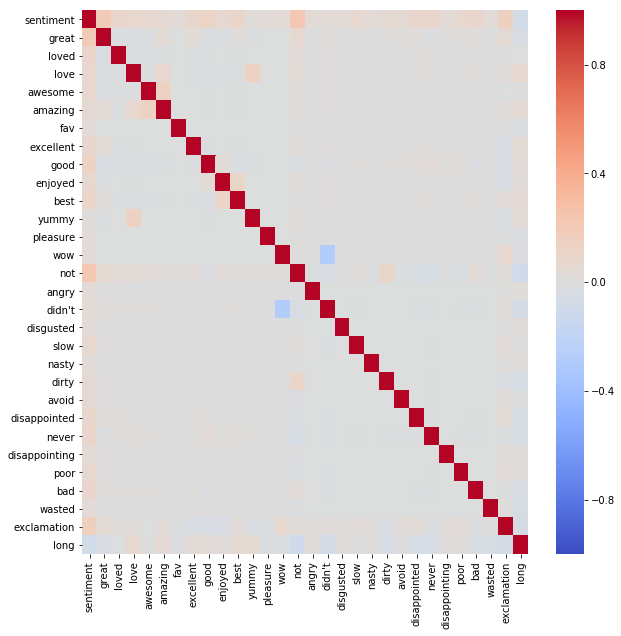

**Yelp**

Bernoulli Naive Bayes.
Number of mislabeled points out of a total 1000 points : 331

Gaussian Naive Bayes.
Number of mislabeled points out of a total 1000 points : 439

Complement Naive Bayes.
Number of mislabeled points out of a total 1000 points : 347



In [4]:
data_path = 'sentiment labelled sentences/yelp_labelled.txt'

check_sentiment(data_path, 'Yelp')

## Use the same model for Amazon Reviews

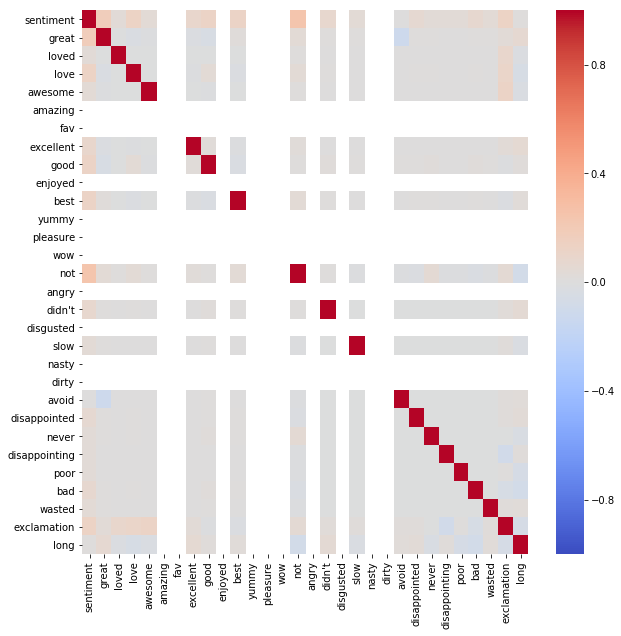

**Amazon**

Bernoulli Naive Bayes.
Number of mislabeled points out of a total 1000 points : 378

Gaussian Naive Bayes.
Number of mislabeled points out of a total 1000 points : 406

Complement Naive Bayes.
Number of mislabeled points out of a total 1000 points : 383



In [5]:
data_path = 'sentiment labelled sentences/amazon_cells_labelled.txt'

check_sentiment(data_path, 'Amazon')